In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
dataset_file = 'Spam Data.csv'
df = pd.read_csv(dataset_file)

# Explore the dataset
print(df.head())

  Lebal                                               Text
0   ham                          Ok lar  Joking wif u oni 
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham      U dun say so early hor  U c already then say 
3   ham  Nah I don't think he goes to usf, he lives aro...
4  spam  FreeMsg Hey there darling it's been 3 week's n...


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Lebal'], test_size=0.2, random_state=42)

In [5]:
# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [7]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vec)

In [8]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.98
Confusion Matrix:
 [[950   5]
 [ 15 145]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       955
        spam       0.97      0.91      0.94       160

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



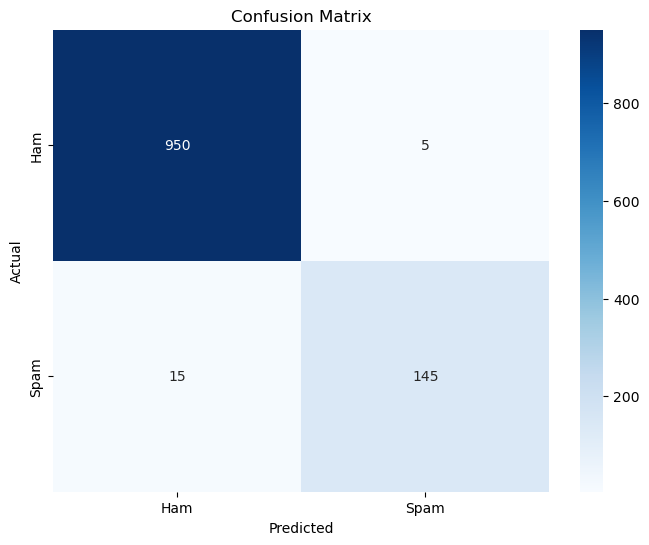

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Function to predict new email type
def predict_email_type(email_text):
    # Vectorize the input text
    input_vec = vectorizer.transform([email_text])

    # Make prediction
    prediction = classifier.predict(input_vec)

    return prediction[0]

# Get user input
user_email = input("Enter the email text to predict (press Enter to exit): ")

while user_email:
    # Make prediction
    result = predict_email_type(user_email)

    # Display the prediction
    print(f"\nPredicted Email Type: {result}\n")

    # Get user input for the next email
    user_email = input("Enter the email text to predict (or Stop kernel to exit): ")

print("Exiting the program.")


Enter the email text to predict (press Enter to exit): Why is this message in spam? It is similar to messages that were identified as spam in the past.

Predicted Email Type: ham

Enter the email text to predict (press Enter to exit): You have signed up for a trial subscription from LinkedIn Corporation on Google Play. Your trial will end on Jan 1, 2024. You will be automatically charged the subscription cost (currently Rs 17,000.00/month) at the end of your trial unless you cancel. You can cancel at any time. Manage your subscriptions  To help keep your subscription active, add a backup payment method.

Predicted Email Type: spam

Enter the email text to predict (press Enter to exit): exit

Predicted Email Type: ham

Enter the email text to predict (press Enter to exit): Building a PDF Chatbot with Streamlit and LangChain

Predicted Email Type: ham

Enter the email text to predict (press Enter to exit): The Bitcoin Cash Podcast #99: BCHouse & ABLA Lock-in feat. FiendishCrypto  Streami

KeyboardInterrupt: Interrupted by user